In [246]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns   
from pivottablejs import pivot_ui
import datetime
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# from sklearn._ import
# from scipy.stats import 
# import statsmodels.api as sm


In [2]:
nlms = pd.read_csv('data/NLMS_PublicUse_5.1/11_new.csv', index_col='record');

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
nlms.columns

Index(['age', 'race', 'sex', 'ms', 'hisp', 'adjinc', 'educ', 'pob', 'wt',
       'hhid', 'hhnum', 'reltrf', 'occ', 'majocc', 'ind', 'majind', 'esr',
       'urban', 'smsast', 'inddea', 'cause113', 'follow', 'dayod', 'hosp',
       'hospd', 'ssnyn', 'vt', 'histatus', 'hitype', 'povpct', 'stater',
       'rcow', 'tenure', 'citizen', 'health', 'indalg', 'smok100', 'agesmk',
       'smokstat', 'smokhome', 'curruse', 'everuse'],
      dtype='object')

In [4]:
cols = ['age', 'race', 'sex', 'ms', 'hisp', 'adjinc', 'educ', 'pob',
       'wt', 'hhid', 'hhnum', 'reltrf', 'occ', 'majocc', 'ind', 'majind',
       'esr', 'urban', 'smsast', 'inddea', 'cause113', 'follow', 'dayod',
       'hosp', 'hospd', 'ssnyn', 'vt', 'histatus', 'hitype', 'povpct',
       'stater', 'rcow', 'tenure', 'citizen', 'health', 'indalg', 'smok100',
       'agesmk', 'smokstat', 'smokhome', 'curruse', 'everuse']

In [5]:
col_dict = {'index': 'record number', 'age': 'age at time of interview', 'race': 'race', 'sex': 'gender', 
            'ms': 'marital status', 'hisp': 'hispanic', 'adjinc': 'inflation adjusted income', 'educ': 'highest grade completed', 
            'pob': 'region of birth', 'wt': 'adjusted weight', 'hhid': 'household ID number', 'hhnum': 'number of people in household',
            'reltrf': 'relationship to reference person', 'occ': '4 digit occupation code', 'majocc': 'major occupation code',
            'ind': '4 digit industry code', 'majind': 'major industry code', 'esr': 'employment status recode', 
            'urban': 'urban / rural status', 'smsast': 'SMSAST (Standard Metropolitan Statistical Area) status', 'inddea': 'death indicator',
            'cause113': 'cause of death', 'follow': 'length of follow-up', 'dayod': 'day of week of death', 
            'hosp': 'hospital type', 'hosppd': 'hospital death indicator', 'ssnyn': 'presence of ssn', 
            'vt': 'veteran status', 'histatus': 'health insurance status', 'hitype': 'health insurance type', 
            'povpct': 'income as percent of poverty level', 'stater': 'state recode', 'rcow': 'recoded class of worker', 
            'tenure': 'housing tenure', 'citizen': 'citizenship', 'health': 'health', 'indalg': 'indicator of algorithmic death', 
            'smok100': 'smoked more than 100 cigarettes', 'agesmk': 'age started smoking',
            'smokstat': 'cigarette smoking status', 'smokhome': 'rules for smoking cigarettes in the home', 
            'curruse': 'currently use smokeless tobacco', 'everuse': 'ever use smokeless tobacco'}

In [6]:
print(col_dict)

{'index': 'record number', 'age': 'age at time of interview', 'race': 'race', 'sex': 'gender', 'ms': 'marital status', 'hisp': 'hispanic', 'adjinc': 'inflation adjusted income', 'educ': 'highest grade completed', 'pob': 'region of birth', 'wt': 'adjusted weight', 'hhid': 'household ID number', 'hhnum': 'number of people in household', 'reltrf': 'relationship to reference person', 'occ': '4 digit occupation code', 'majocc': 'major occupation code', 'ind': '4 digit industry code', 'majind': 'major industry code', 'esr': 'employment status recode', 'urban': 'urban / rural status', 'smsast': 'SMSAST (Standard Metropolitan Statistical Area) status', 'inddea': 'death indicator', 'cause113': 'cause of death', 'follow': 'length of follow-up', 'dayod': 'day of week of death', 'hosp': 'hospital type', 'hosppd': 'hospital death indicator', 'ssnyn': 'presence of ssn', 'vt': 'veteran status', 'histatus': 'health insurance status', 'hitype': 'health insurance type', 'povpct': 'income as percent of p

In [7]:
lens = nlms.apply(lambda x: len(x.unique()))
lens

age             91
race             6
sex              2
ms               6
hisp             4
adjinc          15
educ            15
pob             64
wt             930
hhid        745424
hhnum           21
reltrf           7
occ            365
majocc          12
ind            229
majind          15
esr              6
urban            3
smsast           4
inddea           2
cause113       106
follow        4019
dayod            8
hosp             7
hospd            6
ssnyn            2
vt               3
histatus         3
hitype           7
povpct          21
stater          51
rcow             6
tenure           4
citizen          6
health           6
indalg           3
smok100          1
agesmk           1
smokstat         1
smokhome         1
curruse          1
everuse          1
dtype: int64

In [8]:
nlms.pob.unique()

array([909,   0, 942, 928, 917, 925, 104, 111, 934, 945, 936, 944, 107,
       927, 926, 948, 906, 950, 937, 911, 933, 939, 106, 109, 912, 108,
       913, 102, 949, 103, 931, 954, 951, 924, 901, 918, 938, 956, 923,
       947, 921, 101, 105, 955, 941, 953, 905, 902, 920, 915, 904, 930,
       922, 940, 932, 908, 910, 946, 935, 110, 919, 916, 929, 960])

In [9]:
pob_dict = {909: 'CT',   0: np.nan, 942: 'PA', 928: 'MS', 917: 'IL', 925: 'MA', 104: 'Western Europe', 111: 'Other NS', 934: 'NJ', 945: 'SC', 936: 'NY', 944: 'RI', 107: 'Central America',
       927: 'MN', 926: 'MI', 948: 'TX', 906: 'CA', 950: 'VT', 937: 'NC', 911: 'DC', 933: 'NH', 939: 'OH', 106: 'South America', 109: 'Island Country', 912: 'FL', 108: 'Mexico',
       913: 'GA', 102: 'Asia', 949: 'UT', 103: 'Eastern Europe', 931: 'NE', 954: 'WV', 951: 'VA', 924: 'MD', 901: 'AL', 918: 'IN', 938: 'ND', 956: 'WY', 923: 'ME',
       947: 'TN', 921: 'KY', 101: 'Africa', 105: 'North Am, Not US or Mexico', 955: 'WI', 941: 'OR', 953: 'WA', 905: 'AR', 902: 'AK', 920: 'KS', 915: 'HI', 904: 'AZ', 930: 'MT',
       922: 'LA', 940: 'OK', 932: 'NV', 908: 'CO', 910: 'DE', 946: 'SD', 935: 'NM', 110: 'Other NS', 919: 'IA', 916: 'ID', 929: 'MO', 960: 'American Samoa'}

In [10]:
print('Pre na qty: ' + str(nlms.isnull().sum() * 100 / len(nlms)))

Pre na qty: age           0.000000
race          0.157487
sex           0.000000
ms           19.684568
hisp          2.861032
adjinc        2.412385
educ         19.120231
pob           0.000000
wt            0.000000
hhid          0.000000
hhnum         0.000000
reltrf        0.254704
occ          46.609888
majocc       46.609888
ind          46.621931
majind       46.621931
esr          19.122029
urban         0.710708
smsast        0.711471
inddea        0.000000
cause113      0.000000
follow        0.000000
dayod        91.240126
hosp         91.401209
hospd        92.088921
ssnyn         0.000000
vt           21.582314
histatus     31.484596
hitype       31.484596
povpct        0.000000
stater        0.000000
rcow         46.521880
tenure        1.386703
citizen      74.667969
health       79.067361
indalg       80.994806
smok100     100.000000
agesmk      100.000000
smokstat    100.000000
smokhome    100.000000
curruse     100.000000
everuse     100.000000
dtype: float64


In [11]:
nlms.follow.value_counts(normalize=True)

4018    0.912401
3617    0.000039
2531    0.000036
3199    0.000036
3565    0.000035
          ...   
7       0.000010
478     0.000009
3       0.000007
1       0.000007
0       0.000001
Name: follow, Length: 4019, dtype: float64

In [12]:
nlms.drop(columns=['smok100', 'agesmk', 'smokstat', 'smokhome', 'curruse', 'everuse'], inplace=True)

In [13]:
nlms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1835072 entries, 88426 to 670
Data columns (total 36 columns):
 #   Column    Dtype  
---  ------    -----  
 0   age       int64  
 1   race      float64
 2   sex       int64  
 3   ms        float64
 4   hisp      float64
 5   adjinc    float64
 6   educ      float64
 7   pob       int64  
 8   wt        int64  
 9   hhid      int64  
 10  hhnum     int64  
 11  reltrf    float64
 12  occ       float64
 13  majocc    float64
 14  ind       float64
 15  majind    float64
 16  esr       float64
 17  urban     float64
 18  smsast    float64
 19  inddea    int64  
 20  cause113  int64  
 21  follow    int64  
 22  dayod     float64
 23  hosp      float64
 24  hospd     float64
 25  ssnyn     int64  
 26  vt        float64
 27  histatus  float64
 28  hitype    float64
 29  povpct    int64  
 30  stater    int64  
 31  rcow      float64
 32  tenure    float64
 33  citizen   float64
 34  health    float64
 35  indalg    float64
dtypes: float

In [14]:
nlms.shape

(1835072, 36)

### DataFrame for deceased individuals

In [36]:
dec = nlms[nlms.dayod.isin([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0])]


In [37]:
dec.shape

(160750, 36)

In [38]:
dec.to_csv('data/dec.csv')

In [165]:
# Start over here: 
dec = pd.read_csv('data/dec.csv')

In [166]:
# Split before preprocessing
dec_label = dec.pop('age')
dec_features = dec.copy()

In [167]:
dec_feat_train, dec_feat_test, dec_label_train, dec_label_test = train_test_split(dec_features, dec_label, test_size=0.2)

In [198]:
dec_feat_test.to_csv('data/testing/dec_feat_test.csv')
dec_label_test.to_csv('data/testing/dec_label_test.csv')

#### Pipeline for Processing

In [168]:
cols_to_drop = ['hhid', 'reltrf', 'occ', 'majocc', 'majind', 'ind', 'smsast', 
                'inddea', 'follow', 'hospd', 'stater', 'health', 'indalg',
               'citizen', 'rcow']

In [169]:
dec_feat_train.drop(columns=cols_to_drop, inplace=True, axis=1);

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [171]:
dec_feat_train.columns

Index(['record', 'race', 'sex', 'ms', 'hisp', 'adjinc', 'educ', 'pob', 'wt',
       'hhnum', 'esr', 'urban', 'cause113', 'dayod', 'hosp', 'ssnyn', 'vt',
       'histatus', 'hitype', 'povpct', 'tenure'],
      dtype='object')

In [172]:
cat_cols = ['race', 'sex', 'ms', 'hisp', 'pob', 'esr', 'urban', 
               'cause113', 'dayod', 'hosp', 'ssnyn', 'vt', 'histatus', 'hitype', 'tenure']

num_cols = ['adjinc', 'educ', 'wt', 'hhnum']

Fill missing values

In [173]:
imputer = KNNImputer(n_neighbors=1)

In [175]:
dec_feat_train.set_index('record', inplace=True)

In [179]:
cat_df_imp = pd.DataFrame(imputer.fit_transform(dec_feat_train[cat_cols]), columns=cat_cols, index=dec_feat_train.index)

In [180]:
cat_df_imp

,race,sex,ms,hisp,pob,esr,urban,cause113,dayod,hosp,ssnyn,vt,histatus,hitype,tenure
record,,,,,,,,,,,,,,,
970788,1.0,2.0,1.0,3.0,937.0,5.0,1.0,27.0,2.0,4.0,1.0,0.0,1.0,1.0,1.0
842203,1.0,1.0,1.0,3.0,918.0,4.0,1.0,52.0,6.0,1.0,1.0,0.0,1.0,1.0,1.0
835196,2.0,2.0,2.0,3.0,901.0,1.0,2.0,21.0,7.0,1.0,1.0,0.0,1.0,1.0,3.0
522533,1.0,2.0,3.0,3.0,936.0,1.0,1.0,55.0,6.0,1.0,1.0,0.0,1.0,1.0,2.0
865793,1.0,1.0,1.0,3.0,936.0,5.0,1.0,67.0,2.0,2.0,1.0,0.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535321,1.0,2.0,2.0,3.0,936.0,5.0,1.0,55.0,4.0,1.0,1.0,0.0,1.0,1.0,1.0
1446125,1.0,1.0,1.0,3.0,942.0,5.0,1.0,32.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
553998,1.0,1.0,1.0,3.0,926.0,4.0,1.0,73.0,4.0,4.0,0.0,1.0,1.0,1.0,1.0


In [181]:
imputer_num = KNNImputer(n_neighbors=3)

In [182]:
num_df_imp = pd.DataFrame(imputer_num.fit_transform
                          (dec_feat_train[num_cols]), 
                          columns=num_cols, 
                          index=dec_feat_train.index)

In [186]:
df = cat_df_imp.merge(num_df_imp, left_index=True, right_index=True)


In [189]:
df

,race,sex,ms,hisp,pob,esr,urban,cause113,dayod,hosp,ssnyn,vt,histatus,hitype,tenure,adjinc,educ,wt,hhnum
record,,,,,,,,,,,,,,,,,,,
970788,1.0,2.0,1.0,3.0,937.0,5.0,1.0,27.0,2.0,4.0,1.0,0.0,1.0,1.0,1.0,14.000000,8.000000,71.0,2.0
842203,1.0,1.0,1.0,3.0,918.0,4.0,1.0,52.0,6.0,1.0,1.0,0.0,1.0,1.0,1.0,7.000000,8.000000,144.0,2.0
835196,2.0,2.0,2.0,3.0,901.0,1.0,2.0,21.0,7.0,1.0,1.0,0.0,1.0,1.0,3.0,4.000000,10.000000,112.0,2.0
522533,1.0,2.0,3.0,3.0,936.0,1.0,1.0,55.0,6.0,1.0,1.0,0.0,1.0,1.0,2.0,2.000000,8.000000,178.0,1.0
865793,1.0,1.0,1.0,3.0,936.0,5.0,1.0,67.0,2.0,2.0,1.0,0.0,1.0,1.0,2.0,4.000000,5.000000,197.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535321,1.0,2.0,2.0,3.0,936.0,5.0,1.0,55.0,4.0,1.0,1.0,0.0,1.0,1.0,1.0,12.000000,4.000000,123.0,6.0
1446125,1.0,1.0,1.0,3.0,942.0,5.0,1.0,32.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.000000,12.000000,56.0,2.0
553998,1.0,1.0,1.0,3.0,926.0,4.0,1.0,73.0,4.0,4.0,0.0,1.0,1.0,1.0,1.0,8.666667,4.000000,228.0,5.0


In [191]:
dec_feat_train = df.copy()

In [192]:
saved = dec_feat_train.copy()

In [193]:
saved.to_csv('data/saved.csv')

In [232]:
dec_feat_train

,race,sex,ms,hisp,pob,esr,urban,cause113,dayod,hosp,ssnyn,vt,histatus,hitype,tenure,adjinc,educ,wt,hhnum
record,,,,,,,,,,,,,,,,,,,
970788,1.0,2.0,1.0,3.0,937.0,5.0,1.0,27.0,2.0,4.0,1.0,0.0,1.0,1.0,1.0,14.000000,8.000000,71.0,2.0
842203,1.0,1.0,1.0,3.0,918.0,4.0,1.0,52.0,6.0,1.0,1.0,0.0,1.0,1.0,1.0,7.000000,8.000000,144.0,2.0
835196,2.0,2.0,2.0,3.0,901.0,1.0,2.0,21.0,7.0,1.0,1.0,0.0,1.0,1.0,3.0,4.000000,10.000000,112.0,2.0
522533,1.0,2.0,3.0,3.0,936.0,1.0,1.0,55.0,6.0,1.0,1.0,0.0,1.0,1.0,2.0,2.000000,8.000000,178.0,1.0
865793,1.0,1.0,1.0,3.0,936.0,5.0,1.0,67.0,2.0,2.0,1.0,0.0,1.0,1.0,2.0,4.000000,5.000000,197.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535321,1.0,2.0,2.0,3.0,936.0,5.0,1.0,55.0,4.0,1.0,1.0,0.0,1.0,1.0,1.0,12.000000,4.000000,123.0,6.0
1446125,1.0,1.0,1.0,3.0,942.0,5.0,1.0,32.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.000000,12.000000,56.0,2.0
553998,1.0,1.0,1.0,3.0,926.0,4.0,1.0,73.0,4.0,4.0,0.0,1.0,1.0,1.0,1.0,8.666667,4.000000,228.0,5.0


### One-Hot Encoding for Categorical Variables

In [237]:
dec_feat_train.shape

(128600, 19)

In [233]:
encoder = OneHotEncoder(categories=cat_cols, drop='first')

In [236]:
encoder.fit_transform(dec_feat_train)

ValueError: Shape mismatch: if categories is an array, it has to be of shape (n_features,).

In [194]:
dec_ft_enc = pd.get_dummies(dec_feat_train, prefix_sep="__",
                              columns=cat_cols, drop_first=True)

In [209]:
dec_ft_enc 

,adjinc,educ,wt,hhnum,race__2.0,race__3.0,race__4.0,race__5.0,sex__2.0,ms__2.0,...,ssnyn__1.0,vt__1.0,histatus__1.0,hitype__1.0,hitype__2.0,hitype__3.0,hitype__4.0,hitype__5.0,tenure__2.0,tenure__3.0
record,,,,,,,,,,,,,,,,,,,,,
970788,14.000000,8.000000,71.0,2.0,0,0,0,0,1,0,...,1,0,1,1,0,0,0,0,0,0
842203,7.000000,8.000000,144.0,2.0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
835196,4.000000,10.000000,112.0,2.0,1,0,0,0,1,1,...,1,0,1,1,0,0,0,0,0,1
522533,2.000000,8.000000,178.0,1.0,0,0,0,0,1,0,...,1,0,1,1,0,0,0,0,1,0
865793,4.000000,5.000000,197.0,2.0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535321,12.000000,4.000000,123.0,6.0,0,0,0,0,1,1,...,1,0,1,1,0,0,0,0,0,0
1446125,4.000000,12.000000,56.0,2.0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0
553998,8.666667,4.000000,228.0,5.0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0


#### Scaling the Data

In [199]:
scaler = MinMaxScaler()

In [200]:
dec_feat_train_scaled = scaler.fit_transform(dec_ft_enc)

In [207]:
dec_feat_train_scaled.shape

(128600, 208)

#### Creating the Pipeline

In [ ]:
numeric_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='mean'))
      ,('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
       ('imputer', imputer_num))
      ,('encoder', OrdinalEncoder())
])

In [211]:
pca = PCA()
X_pca = pca.fit_transform(dec_feat_train_scaled)

In [222]:
def scree_plot(X, count_pc=None):
    """return the scree plot of the pca of data X
    Args
    ----
    X: np.array() of shape (m,n)
    count_pc (int): the count of pc's to show in the plot
    """
    pca = PCA()
    pca.fit(X)
    l = len(pca.explained_variance_)
    if count_pc is not None:
        num = min(count, l)
    else: 
        num = l
    plt.plot(np.arange(1,num+1), pca.explained_variance_[:num])
    plt.xlabel('ith Principle Component')
    plt.ylabel('Eigenvalue')
    plt.title('Scree Plot')

''

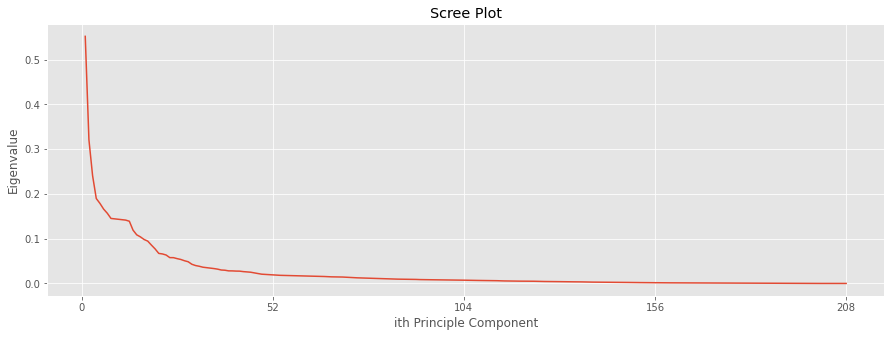

In [231]:
fig, ax = plt.subplots(figsize=(15, 5))
ax = scree_plot(X_pca)
plt.xticks(ticks=np.linspace(0, 208, 5))
;

In [239]:
dec_feat_train_scaled.shape, dec_feat_test.shape, dec_label_train.shape, dec_label_test.shape

((128600, 208), (32150, 36), (128600,), (32150,))

#### Linear Regression 

In [241]:
model_lr = LinearRegression()

In [242]:
model_lr.fit(dec_feat_train_scaled, dec_label_train)

LinearRegression()

In [244]:
predict_train = model_lr.predict(dec_feat_train_scaled)

In [245]:
print('RMSE on train data with LR: ', mean_squared_error(dec_label_train, predict_train))

RMSE on train data:  98.50246386117911


In [247]:
model_rf = RandomForestRegressor()

In [248]:
model_rf.fit(dec_feat_train_scaled, dec_label_train)

RandomForestRegressor()

In [249]:
predict_train_rf = model_rf.predict(dec_feat_train_scaled)

In [250]:
print('RMSE on Train Data with RF: ', mean_squared_error(dec_label_train, predict_train_rf))

RMSE on Train Data with RF:  11.792651547403715


In [251]:
# How do I get predicted values out of this for age, like if I were to put it in a flask app or something

In [ ]:
# Remember to try sns.pairplot on dec_feat_train before transform